# Exploring the Data


In [40]:
##kaggle animal shelter outcome
###explore the data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from pandas import DataFrame,merge
style.use("ggplot")
%matplotlib inline

In [41]:
#load the test data
animals = pd.read_csv('train.csv')

In [42]:
#rows in training dataset
len(animals)

26729

### Overview Analysis


Count of dogs and cats in the shelter during the timeframe October 2013 to March 2016

<bound method NDFrame.describe of Dog    15595
Cat    11134
Name: AnimalType, dtype: int64>

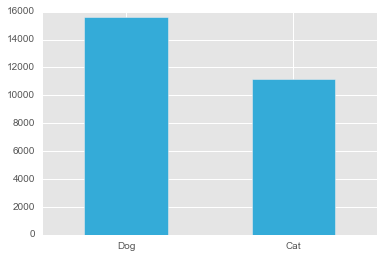

In [58]:
animaltype = animals['AnimalType'].value_counts() 
animaltype.plot(kind='bar', color='#34ABD8', rot=0)
animaltype.describe

Next, plot the different outcome type or distribution of outcome type. This is what we will ultimately predict.

Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Adoption           10769
Name: OutcomeType, dtype: int64

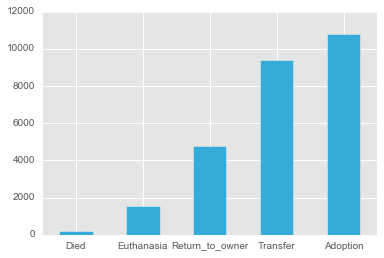

In [67]:
outcometype = animals.OutcomeType.value_counts().sort_values()
outcometype.plot(kind='bar', color='#34ABD8',rot=0)
outcometype

Next, looking at outcome types by dogs and cats. Looks the highest outcomes are generally adoptions and transfers with very low counts for natural death or euthanasia (relatively). 

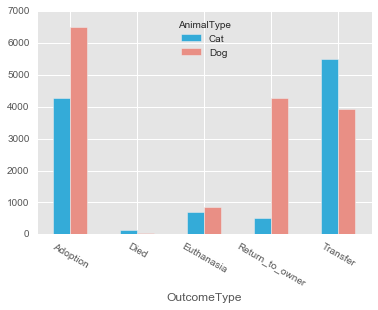

In [66]:
outcometype = animals[['AnimalType','OutcomeType']].groupby(['OutcomeType','AnimalType']).size()
#outcometype.unstack()
outcometype.unstack().plot(kind='bar', color=['#34ABD8','#E98F85'],rot=-30)

Next we look at the Sex Upon Outcome dimension

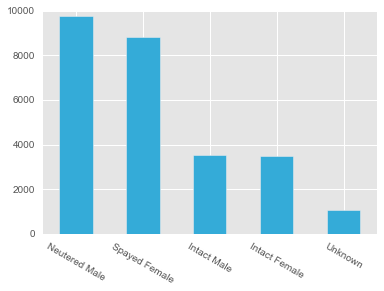

In [69]:
SexuponOutcome = animals['SexuponOutcome'].value_counts()
SexuponOutcome.plot(kind='bar',color=['#34ABD8'],rot=-30)

It would make more sense to split this series into two dimensions: 
1. Whether the animal has been spayed, neutered, remain intact, or unknown
2. Male, Female, or Unknown

In [70]:
sexType = animals['SexuponOutcome'].unique()
print(sexType)

['Neutered Male' 'Spayed Female' 'Intact Male' 'Intact Female' 'Unknown'
 nan]


In [71]:
# create a dict to use are a reference for creating new columns Sex, Neutered
M_F = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
N_T = {'Neutered Male':'Neutered','Spayed Female':'Neutered','Intact Male':'Intact','Intact Female':'Intact','Unknown':'Unknown'}

animals['Sex'] = animals.SexuponOutcome.map(M_F)
animals['Neutered'] = animals.SexuponOutcome.map(N_T)

Next, we plot out for Sex and for Neutered Status

In [103]:
Sex['Sex']

Male       13304
Female     12331
Unknown     1093
Name: Sex, dtype: int64

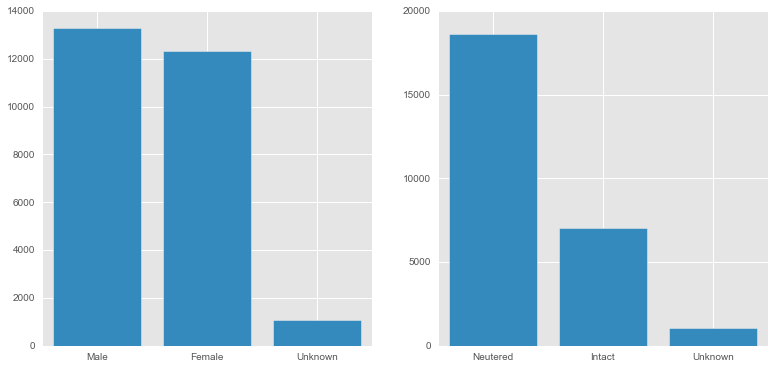

In [188]:
Sex = DataFrame(animals.Sex.value_counts())
Neutered = DataFrame(animals.Neutered.value_counts())

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,6))

# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

ax1.bar([1,2,3],Sex['Sex'],align='center')
ax1.set_xticks([1,2,3])
ax1.set_xticklabels(Sex.index)

ax2.bar([1,2,3],Neutered['Neutered'],align='center')
ax2.set_xticks([1,2,3])
ax2.set_xticklabels(Neutered.index)

Number of male or female animals about equivalent. More neutered animals than intact animals

Next, we can look at sex vs. outcome type

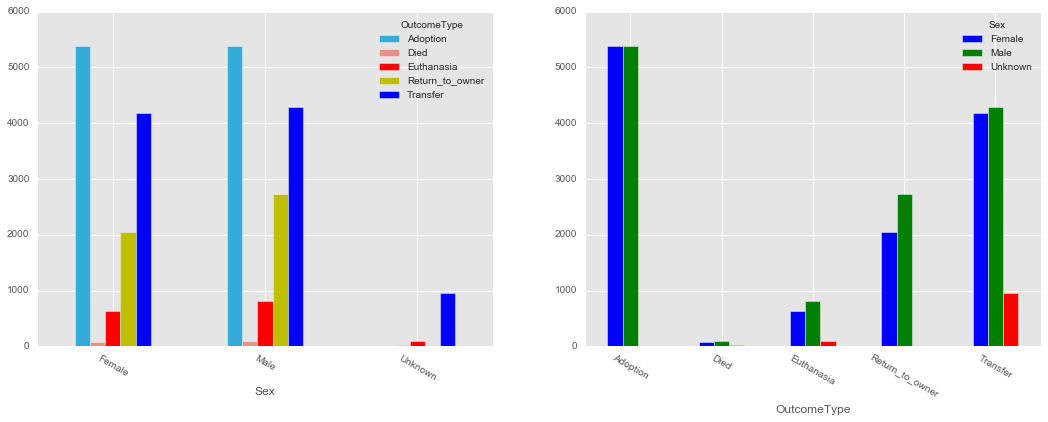

In [190]:
df = DataFrame(animals[['Sex','OutcomeType']])
#df.plot(kind='bar')
OutcomeSex = df.groupby(['Sex','OutcomeType']).size().unstack()
SexOutcome = df.groupby(['OutcomeType','Sex']).size().unstack()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# fig = plt.figure(figsize=(16,4))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# ax1.plot(kind='bar',color=['#34ABD8','#E98F85','r','y','b'],rot=-30) 
# ax2.plot(kind='bar',rot=-30)

OutcomeSex.plot(kind='bar',color=['#34ABD8','#E98F85','r','y','b'],rot=-30, ax=ax1) 
SexOutcome.plot(kind='bar',rot=-30, ax=ax2)

Now we examine neutered status with outcome


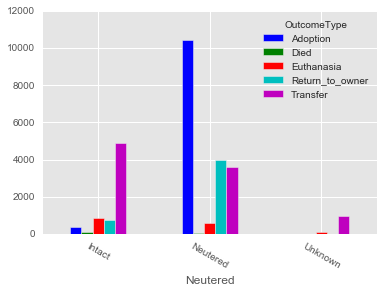

In [170]:
OT_N = animals[['OutcomeType','Neutered']].groupby(['Neutered','OutcomeType']).size().unstack()
OT_N.plot(kind='bar',rot=-30)

Examine by neutered status, outcomes by cats vs. dogs

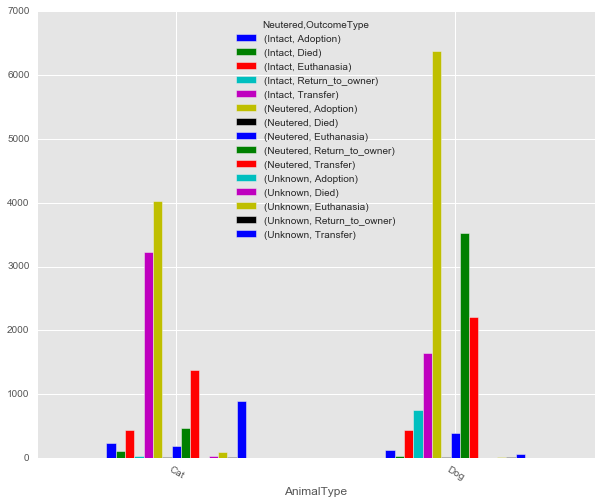

In [172]:
DC = animals[['OutcomeType','Neutered','AnimalType']].groupby(['AnimalType','OutcomeType','Neutered']).size().unstack().unstack()
DC.plot(kind='bar',stacked=False,figsize=(10,8),rot=-30)

In [173]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2/12/2014 18:22,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered
1,A656520,Emily,10/13/2013 12:44,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered
2,A686464,Pearce,1/31/2015 12:28,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered
3,A683430,NaN,7/11/2014 19:09,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact
4,A667013,NaN,11/15/2013 12:52,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered


### Additional Analysis

#### Looking at other features to see if they might show a relationship with outcome

Let's look at the top 10 breed of dog

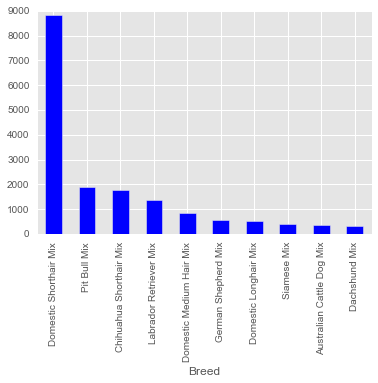

In [175]:
breed = animals.groupby('Breed').size()
breed.sort_values(ascending=False).head(10).plot(kind='bar')

In [178]:
len(animals.Breed.unique())

1380

In [ ]:
# Lets look at the color of the animals

# Cleaning the Data - Prepping for Modeling

In [179]:
#convert DateTime and add DateTimeIn as a new column
animals['DateTime']=pd.to_datetime(a.DateTime, infer_datetime_format=True)   

In [181]:
animals.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered


In [182]:
# converts or calculates age in terms of years
def calc_age_in_years(x):
    x=str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year')> -1: return age
    if x.find('month')> -1: return age/12.
    if x.find('week')> -1: return age/52.
    if x.find('day')> -1: return age/365.
    else: return 0
    
animals['AgeOutInYears'] = animals.AgeuponOutcome.apply(calc_age_in_years)
    

In [183]:
# convert all of the AgeuponOutcome values into weeks

def convert_AgeuponOutcome_to_weeks(df):
    result = {}
    for k in df['AgeuponOutcome'].unique():
        if type(k) != type(""):
            result[k] = -1
        else:
            v1, v2 = k.split()
            if v2 in ["year", "years"]:
                result[k] = int(v1) * 52
            elif v2 in ["month", "months"]:
                result[k] = int(v1) * 4.5
            elif v2 in ["week", "weeks"]:
                result[k] = int(v1)
            elif v2 in ["day", "days"]:
                result[k] = int(v1) / 7
                
    df['AgeOutInWeeks'] = df['AgeuponOutcome'].map(result).astype(float)
    #df = df.drop('AgeuponOutcome', axis = 1)
                
    return df

animals = convert_AgeuponOutcome_to_weeks(animals)
#test_df = convert_AgeuponOutcome_to_weeks(test_df)


In [191]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,AgeOutInYears,AgeOutInWeeks
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,Neutered,1.000000,52
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,Neutered,1.000000,52
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,Neutered,2.000000,104
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,Intact,0.057692,3
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,Neutered,2.000000,104


In [ ]:
# convert features to numeric values

In [ ]:
# split training data into two sets using an 80/20 approach.  
# 80% of train data as a set for building the model, 20% of train data for testing as a validation set
cut = int(len(train_df) * 0.8)
_validation_df = train_df[cut:]
_train_df = train_df[:cut]

print(len(_train_df))
print(len(_validation_df))

# Building a Model

#### Try Random Forest Model

In [194]:
sex_dummies = pd.get_dummies(animals['Sex'])
sex_dummies.head()

,Female,Male,Unknown
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [195]:
neut_dummies = pd.get_dummies(animals['Neutered'])
neut_dummies.head()

,Intact,Neutered,Unknown
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [197]:
animaltype_dummies = pd.get_dummies(animals['AnimalType'])
animaltype_dummies.head()

,Cat,Dog
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [ ]:
# Use scikitlearn to build a Random Forest model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_outcome, test_size=0.15)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, n_jobs=4)
forest.fit(X_train, y_train)

In [ ]:
y_pred_val = forest.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_val, y_pred_val))
print("Accuracy: %1.3f" % accuracy_score(y_val, y_pred_val))

In [ ]:
pd.get_dummies()

#### Try Boosting Classifier Model (AdaBoostClassifier)

In [ ]:
# build a classifier with scikit-learn

import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

A1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),
                        n_estimators = 100,
                        learning_rate = 0.1)

classifiers = [c.fit(_train_df.values[:,1:-1],
                     _train_df.values[:,-1].astype(int)) \
               for c in [A1]]
results = [c.predict_proba(_validation_df.values[:,1:-1]) \
           for c in classifiers]
print(results[0])